Assignment 1:

Question 1:
A.    The data has 120 classes (120 dog breeds) ,10222 train sample images and 10357 test sample images

B.     Each data sample image we insert needs to be 224x224 image with 3 RGB channels.so we need to preprocess the data before using it by resizing the images to the wanted size.

C.    Partly balanced, the number of samples per class varied from 60 to 130.
D.    No


Question 2:

A.    VGG19, without the weights of image-net, we used randomized weights instead due to inability to import it to the jupyter notenook (we tried to look for a solution but the results with the imported image-net database made the results worse)

C.    
- simply resizing the image at preprocessing might negatively impact the accuracy. Padding the images might improve the results.
- freezing the weights of the first 10 layers so that they remain intact throughout the fine-tuning process.
-  Applying the stochastic gradient descent optimizer to minimize the cross entropy loss .
D.    We chose to try to modify the model to get better results


Question 3:

D.    The classic ML algorithm we chose is SVM.    
    

Question 4:

The dataset we chose to work with is the Dog Breed Identification datasets. The dataset includes 120 dog breeds and about 20000 samples. The dataset is partly balanced as the range of samples per breed is 60-120. Each sample had to be resized in order to fit for processing.

The model we chose was VGG19 with changing the last layer of the network to dense and flatten correspond to the task at hand The model has trained and achieved the loss of 4.8%. We wanted to improve this by 3 methods and decided to implement 2. 
We Chose to run the models for 50 epochs for each model.

First, we froze the weights of the 10 first layers of the network. This change yielded a improvement to 4.7% loss.  The other method was to apply the stochastic gradient descent optimizer, this change yielded a improvement to 4.7% loss too. 
The improvents are minor for 50 epochs but if we run each model for more time the improvements will yield better results.

To see how the model compares with different approaches, we use the predictions of the last lair as features with the SVM machine learning algorithm. 
* NOTE: The performance of each module is heavily impacted by our hardware constraints.




In [1]:
import numpy as np
import pandas as pd 
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from random import randint
import matplotlib.pyplot as plt
import cv2
import PIL

import os
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('../input/labels.csv')
df_test = pd.read_csv('../input/sample_submission.csv')

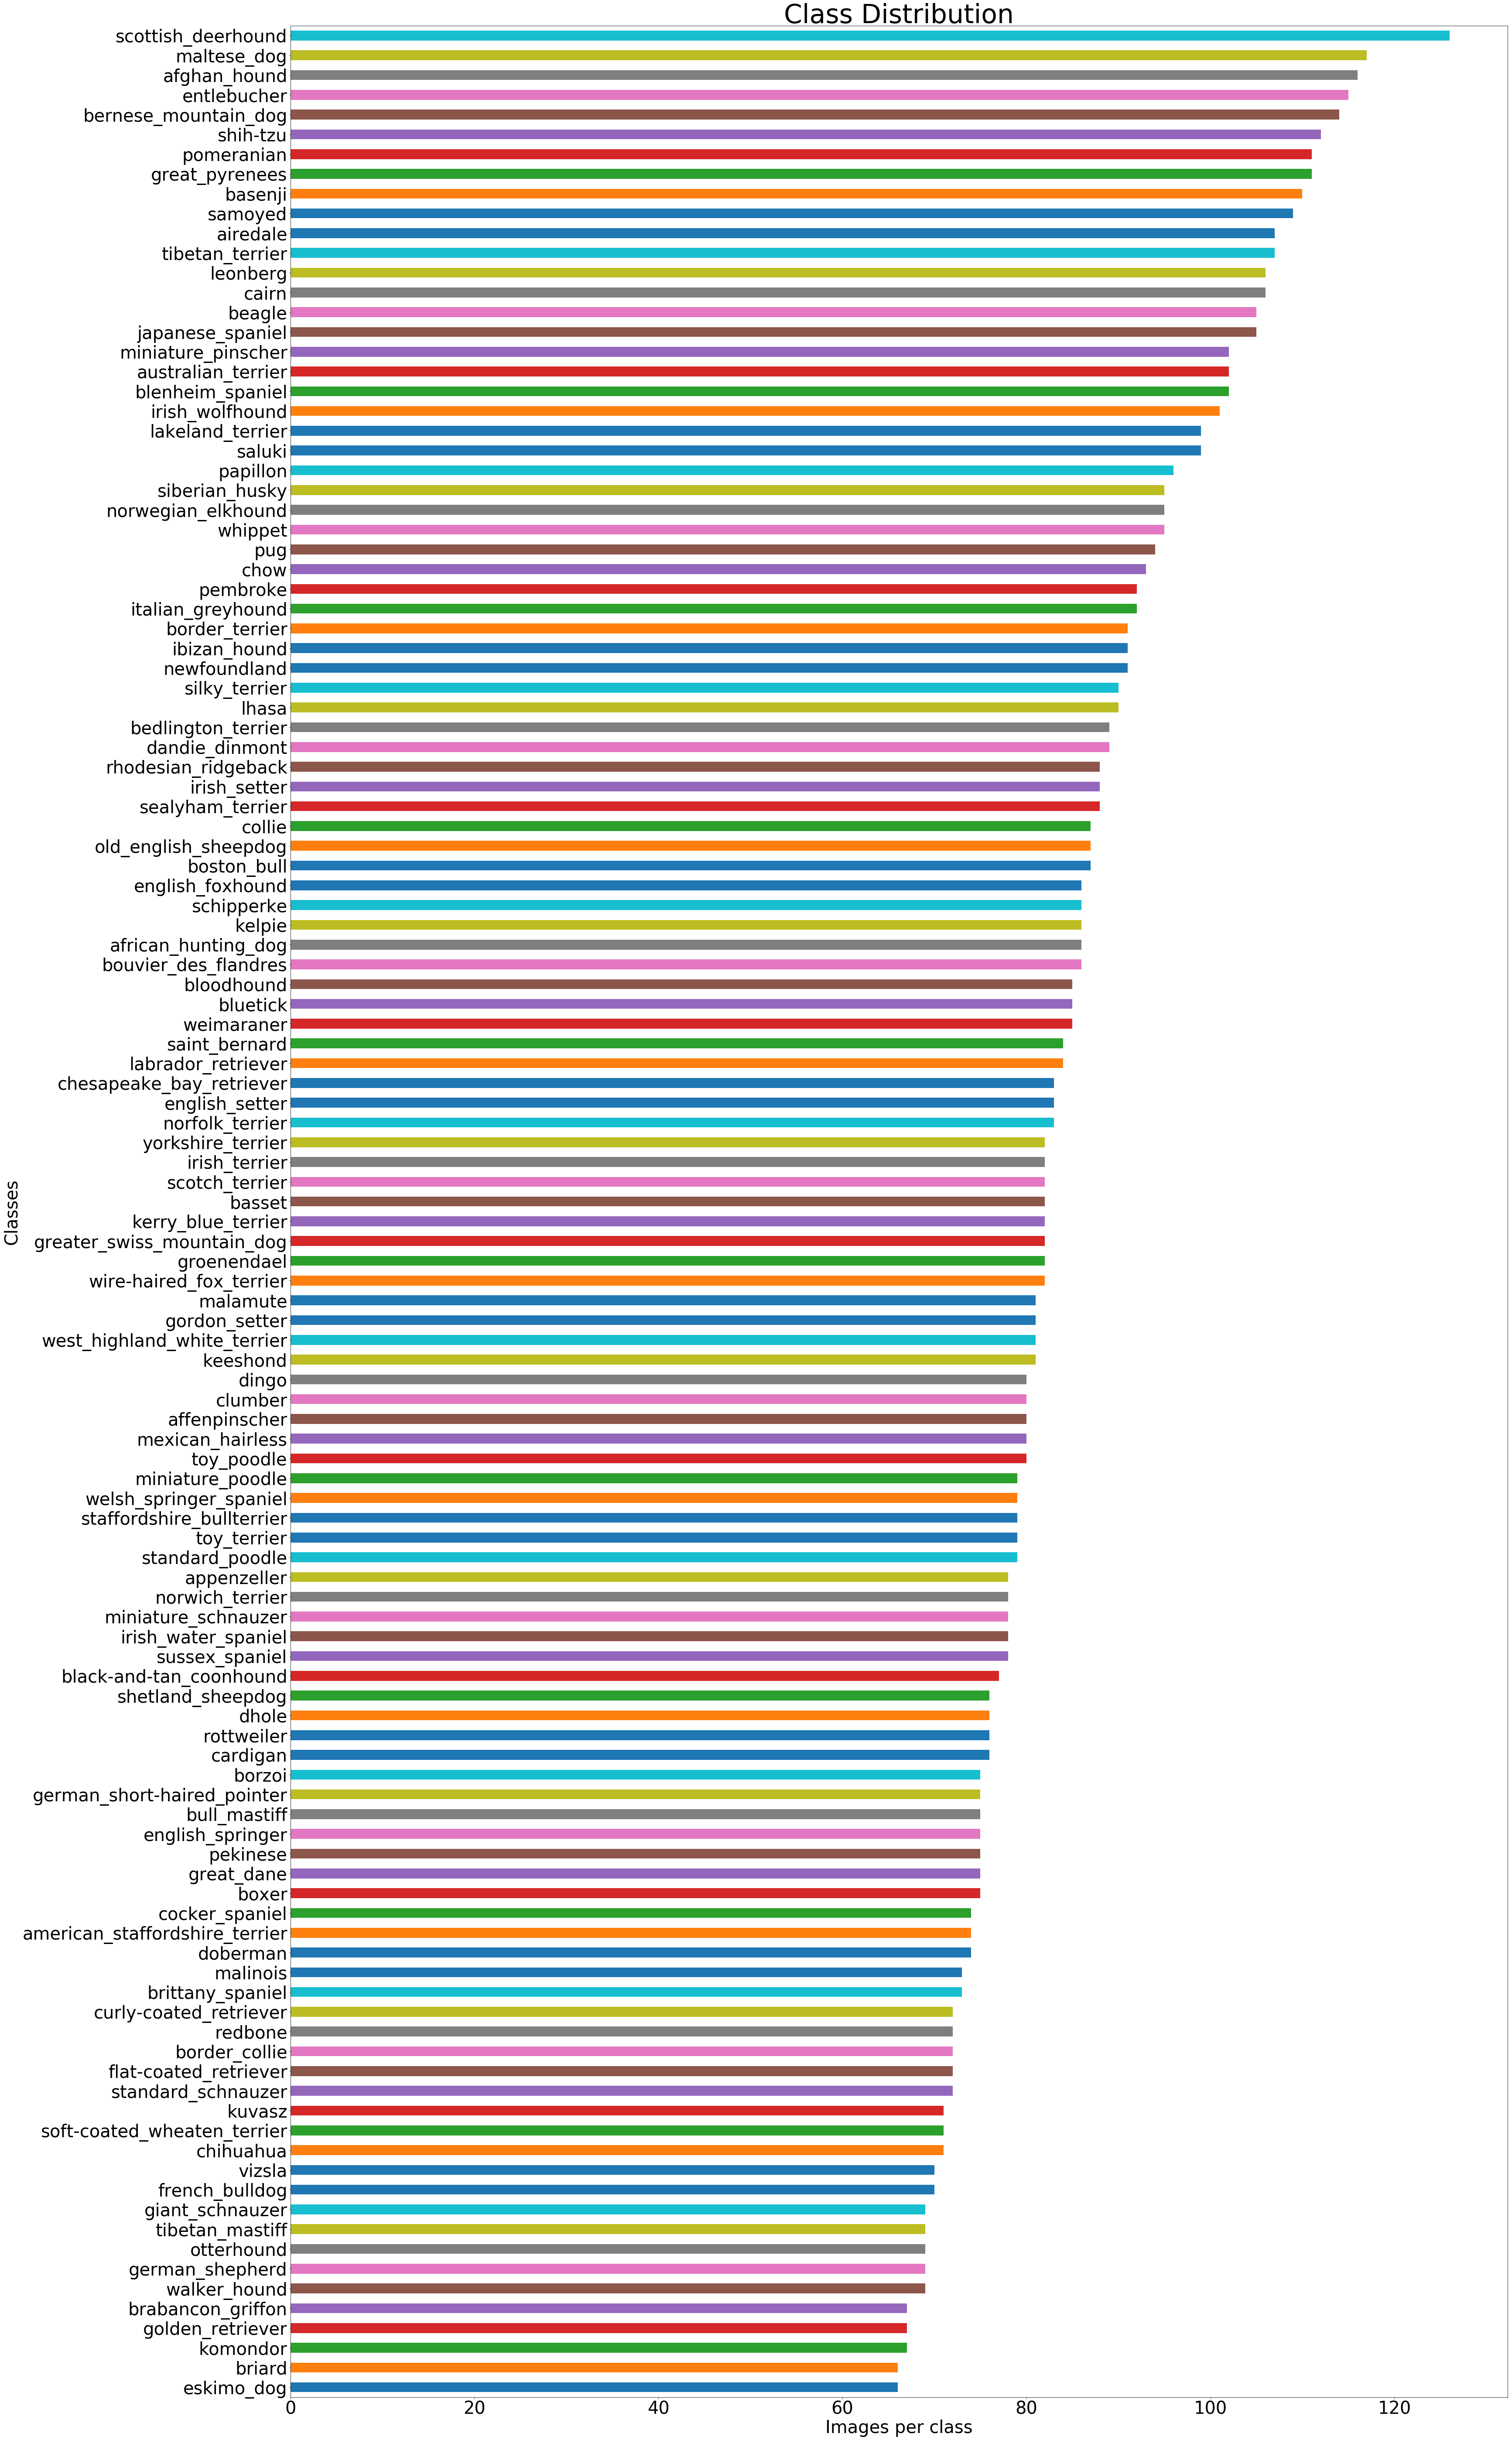

In [3]:
ax=pd.value_counts(df_train['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Class Distribution",
                                                       figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)

In [4]:
targets_series = pd.Series(df_train['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)

In [5]:
one_hot_labels = np.asarray(one_hot)

In [6]:
def read_and_resize_images(df,nrow=224,ncol=224,channels=3):
    i = 0
    x = []
    y = []
    breeds = []
    for f, breed in tqdm(df.values):
        img = PIL.Image.open(os.path.join('../input/train/' + f +'.jpg'))
        label = one_hot_labels[i]
        x.append(img.resize((nrow,ncol)))
        y.append(label)
        breeds.append(breed)
        i += 1
    return x,y,breeds

In [7]:
x_train,y_train,breeds_train = read_and_resize_images(df_train)

100%|██████████| 10222/10222 [00:40<00:00, 254.32it/s]


In [8]:
def read_and_resize_images_test(df,nrow=224,ncol=224,channels=3):
    x = []
    for f in tqdm(df['id'].values):
        img = PIL.Image.open(os.path.join('../input/test/' + f +'.jpg'))
        x.append(img.resize((nrow,ncol)))
    return x

In [9]:
x_test = read_and_resize_images_test(df_test)

100%|██████████| 10357/10357 [00:46<00:00, 209.09it/s]


In [10]:
#y_train_raw = np.array(y_train, dtype=np.uint8)
#x_train_raw = np.array(x_train, dtype=np.float32) / 255.
#x_test  = np.array(x_test, dtype=np.float32) / 255.
x_train_raw = []
x_test_raw = []
y_train_raw = np.asarray(y_train) 
for img in x_train:
    x_train_raw.append(np.array(img))
for img in x_test:
    x_test_raw.append(np.array(img))
    
x_train_raw = np.array(x_train_raw)
x_test_raw = np.array(x_test_raw)

In [11]:
print(x_train_raw.shape)
print(y_train_raw.shape)
print(x_test_raw.shape)

(10222, 224, 224, 3)
(10222, 120)
(10357, 224, 224, 3)


In [12]:
def plot_images(images, classes):
    assert len(images) == len(classes) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3,figsize=(60,60),sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
   
    for i, ax in enumerate(axes.flat):
        # Plot image.
        
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_RGB2BGR).reshape(224,224,3), cmap='hsv')    
        xlabel = "Breed: {0}".format(classes[i])
    
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_size(60)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    
    plt.show()

Images to show: 9
Classes to show: 9


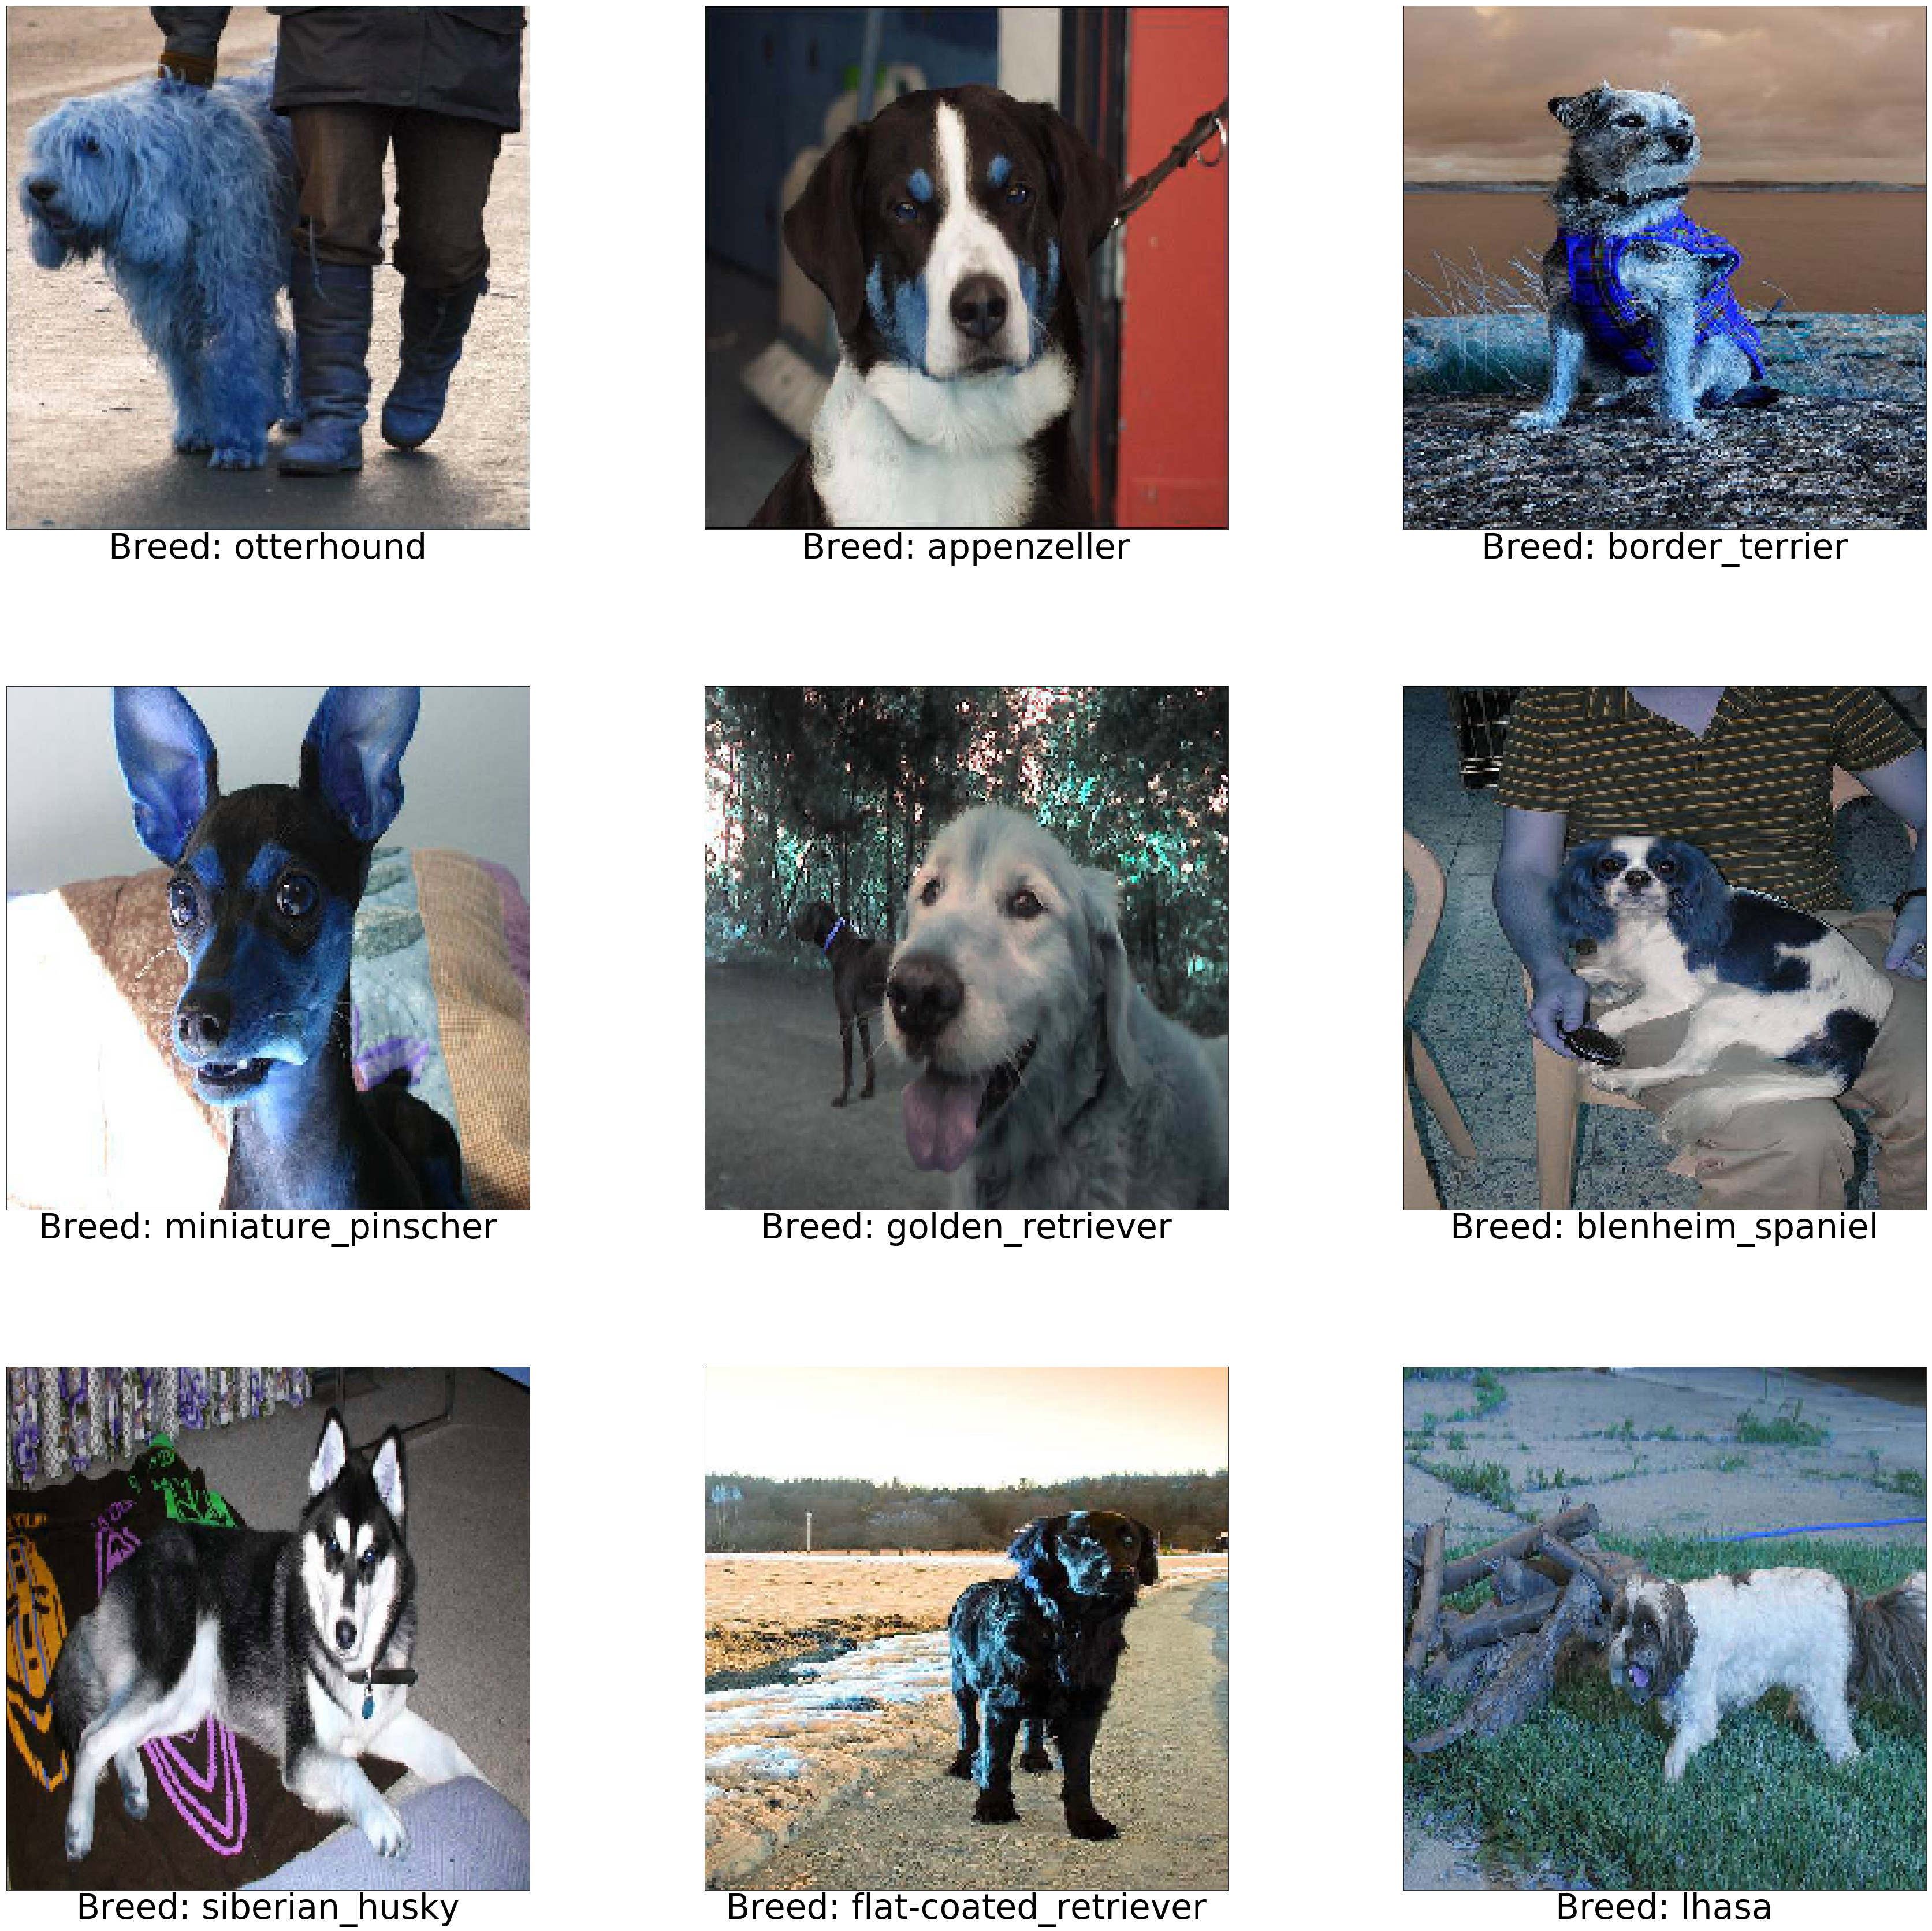

In [13]:

random_numbers = [randint(0, len(x_train)) for p in range(0,9)]
x_train_to_show = [x_train_raw[i] for i in random_numbers]
breeds_train_to_show = [breeds_train[i] for i in random_numbers]
print("Images to show: {0}".format(len(x_train_to_show)))
print("Classes to show: {0}".format(len(breeds_train_to_show)))

plot_images(x_train_to_show, breeds_train_to_show)

In [14]:
num_class = y_train_raw[1]


In [15]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw, y_train_raw, test_size=0.3, random_state=1)

In [ ]:
def prepareModel(num_class):
    base_model = VGG19(#weights='imagenet',
        weights = None, include_top=False, input_shape=(224, 224, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # First: train only the top layers (which were randomly initialized)
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    return model

In [ ]:
firstModel = prepareModel(120)
firstModel.summary()

In [ ]:
firstModel.fit(X_train, Y_train, epochs=15, validation_data=(X_valid, Y_valid), verbose=1)

In [ ]:
preds = firstModel.predict(x_test_raw, verbose=1)

In [ ]:
sub = pd.DataFrame(preds)
col_names = one_hot.columns.values
sub.columns = col_names
# Insert the column id from the sample_submission at the start of the data frame
sub.insert(0, 'id', df_test['id'])
sub.head(100)

In [ ]:
def prepareSecondModel(num_class):
    base_model = VGG19(#weights='imagenet',
        weights = None, include_top=False, input_shape=(224, 224, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # First: train only the top layers (which were randomly initialized)
    for layer in base_model.layers[:10]:
        layer.trainable = False

    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    return model

In [ ]:
secondModel = prepareSecondModel(120)
secondModel.summary()
secondModel.fit(X_train, Y_train, epochs=15, validation_data=(X_valid, Y_valid), verbose=1)

In [ ]:
preds = secondModel.predict(x_test_raw, verbose=1)

In [ ]:
sub = pd.DataFrame(preds)
col_names = one_hot.columns.values
sub.columns = col_names
# Insert the column id from the sample_submission at the start of the data frame
sub.insert(0, 'id', df_test['id'])
sub.head(100)

In [16]:

def prepareThirdModel(num_class):
    base_model = VGG19(#weights='imagenet',
        weights = None, include_top=False, input_shape=(224, 224, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # First: train only the top layers (which were randomly initialized)
    for layer in base_model.layers:
        layer.trainable = False
        
    sgd = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', 
                  optimizer=sgd, 
                  metrics=['accuracy'])

    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    return model

In [17]:
thirdModel = prepareThirdModel(120)
thirdModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
thirdModel.fit(X_train, Y_train, epochs=30, validation_data=(X_valid, Y_valid), verbose=1)

Train on 7155 samples, validate on 3067 samples
Epoch 1/30


6688/7155 [===========================>..] - ETA: 1:12:54 - loss: 4.7806 - acc: 0.0000e+ - ETA: 36:37 - loss: 4.7718 - acc: 0.0000e+00 - ETA: 24:31 - loss: 4.7904 - acc: 0.0000e+ - ETA: 18:28 - loss: 4.7811 - acc: 0.0078   - ETA: 14:50 - loss: 4.7796 - acc: 0.00 - ETA: 12:25 - loss: 4.7844 - acc: 0.01 - ETA: 10:41 - loss: 4.7871 - acc: 0.00 - ETA: 9:23 - loss: 4.7844 - acc: 0.0117 - ETA: 8:22 - loss: 4.7848 - acc: 0.010 - ETA: 7:34 - loss: 4.7837 - acc: 0.009 - ETA: 6:54 - loss: 4.7857 - acc: 0.008 - ETA: 6:21 - loss: 4.7910 - acc: 0.007 - ETA: 5:53 - loss: 4.7988 - acc: 0.007 - ETA: 5:28 - loss: 4.7979 - acc: 0.008 - ETA: 5:08 - loss: 4.8005 - acc: 0.008 - ETA: 4:49 - loss: 4.7961 - acc: 0.007 - ETA: 4:33 - loss: 4.7939 - acc: 0.009 - ETA: 4:19 - loss: 4.7927 - acc: 0.008 - ETA: 4:06 - loss: 4.7946 - acc: 0.008 - ETA: 3:54 - loss: 4.7957 - acc: 0.009 - ETA: 3:43 - loss: 4.7958 - acc: 0.008 - ETA: 3:34 - loss: 4.7970 - acc: 0.008 - ETA: 3:25 - loss: 4.7982 - acc: 0.008 - ETA: 3:17 - lo

7155/7155 [==============================] - ETA: 3s - loss: 4.8000 - acc: 0.009 - ETA: 3s - loss: 4.7998 - acc: 0.009 - ETA: 3s - loss: 4.7999 - acc: 0.009 - ETA: 2s - loss: 4.7998 - acc: 0.009 - ETA: 2s - loss: 4.8000 - acc: 0.009 - ETA: 2s - loss: 4.8001 - acc: 0.009 - ETA: 2s - loss: 4.8005 - acc: 0.009 - ETA: 1s - loss: 4.8004 - acc: 0.009 - ETA: 1s - loss: 4.8006 - acc: 0.009 - ETA: 1s - loss: 4.8003 - acc: 0.009 - ETA: 0s - loss: 4.8005 - acc: 0.009 - ETA: 0s - loss: 4.8004 - acc: 0.009 - ETA: 0s - loss: 4.8006 - acc: 0.009 - ETA: 0s - loss: 4.8006 - acc: 0.009 - 78s 11ms/step - loss: 4.8004 - acc: 0.0098 - val_loss: 4.7870 - val_acc: 0.0160
Epoch 2/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.7940 - acc: 0.0000e+ - ETA: 39s - loss: 4.8031 - acc: 0.0000e+ - ETA: 38s - loss: 4.7914 - acc: 0.0000e+ - ETA: 38s - loss: 4.7691 - acc: 0.0078   - ETA: 38s - loss: 4.7673 - acc: 0.00 - ETA: 38s - loss: 4.7677 - acc: 0.00 - ETA: 38s - loss: 4.7635 - acc: 0.00 - ETA: 38s - loss: 4.7669 - acc: 0.00 - ETA: 38s - loss: 4.7618 - acc: 0.00 - ETA: 37s - loss: 4.7588 - acc: 0.01 - ETA: 37s - loss: 4.7684 - acc: 0.01 - ETA: 37s - loss: 4.7692 - acc: 0.01 - ETA: 37s - loss: 4.7672 - acc: 0.01 - ETA: 37s - loss: 4.7675 - acc: 0.01 - ETA: 36s - loss: 4.7687 - acc: 0.01 - ETA: 36s - loss: 4.7652 - acc: 0.01 - ETA: 36s - loss: 4.7634 - acc: 0.01 - ETA: 36s - loss: 4.7656 - acc: 0.01 - ETA: 36s - loss: 4.7692 - acc: 0.01 - ETA: 36s - loss: 4.7618 - acc: 0.01 - ETA: 35s - loss: 4.7594 - acc: 0.01 - ETA: 35s - loss: 4.7591 - acc: 0.01 - ETA: 35s - loss: 4.7568 - acc: 0.01 - ETA: 35s - loss: 4.7594 - acc: 0.01 - ETA: 35s - loss: 4.7607 - a

7155/7155 [==============================] - ETA: 1s - loss: 4.7795 - acc: 0.012 - ETA: 1s - loss: 4.7793 - acc: 0.012 - ETA: 0s - loss: 4.7799 - acc: 0.011 - ETA: 0s - loss: 4.7798 - acc: 0.011 - ETA: 0s - loss: 4.7797 - acc: 0.011 - ETA: 0s - loss: 4.7797 - acc: 0.011 - ETA: 0s - loss: 4.7795 - acc: 0.011 - ETA: 0s - loss: 4.7795 - acc: 0.011 - 56s 8ms/step - loss: 4.7793 - acc: 0.0117 - val_loss: 4.7691 - val_acc: 0.0137
Epoch 3/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.6765 - acc: 0.03 - ETA: 38s - loss: 4.7311 - acc: 0.01 - ETA: 38s - loss: 4.7285 - acc: 0.01 - ETA: 38s - loss: 4.7380 - acc: 0.00 - ETA: 38s - loss: 4.7540 - acc: 0.01 - ETA: 38s - loss: 4.7342 - acc: 0.01 - ETA: 38s - loss: 4.7256 - acc: 0.01 - ETA: 38s - loss: 4.7162 - acc: 0.01 - ETA: 37s - loss: 4.7209 - acc: 0.01 - ETA: 37s - loss: 4.7277 - acc: 0.01 - ETA: 37s - loss: 4.7279 - acc: 0.01 - ETA: 37s - loss: 4.7292 - acc: 0.01 - ETA: 37s - loss: 4.7289 - acc: 0.01 - ETA: 37s - loss: 4.7311 - acc: 0.01 - ETA: 36s - loss: 4.7387 - acc: 0.01 - ETA: 36s - loss: 4.7430 - acc: 0.01 - ETA: 36s - loss: 4.7424 - acc: 0.01 - ETA: 36s - loss: 4.7435 - acc: 0.01 - ETA: 36s - loss: 4.7439 - acc: 0.01 - ETA: 36s - loss: 4.7474 - acc: 0.01 - ETA: 35s - loss: 4.7457 - acc: 0.01 - ETA: 35s - loss: 4.7488 - acc: 0.01 - ETA: 35s - loss: 4.7460 - acc: 0.01 - ETA: 35s - loss: 4.7463 - acc: 0.01 - ETA: 35s - loss: 4.7449 - acc: 0.01 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7563 - acc: 0.016 - ETA: 1s - loss: 4.7561 - acc: 0.016 - ETA: 0s - loss: 4.7564 - acc: 0.016 - ETA: 0s - loss: 4.7565 - acc: 0.016 - ETA: 0s - loss: 4.7566 - acc: 0.015 - ETA: 0s - loss: 4.7561 - acc: 0.016 - ETA: 0s - loss: 4.7561 - acc: 0.015 - ETA: 0s - loss: 4.7560 - acc: 0.015 - 56s 8ms/step - loss: 4.7560 - acc: 0.0158 - val_loss: 4.7556 - val_acc: 0.0153
Epoch 4/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.6791 - acc: 0.0000e+ - ETA: 39s - loss: 4.7444 - acc: 0.0000e+ - ETA: 38s - loss: 4.7249 - acc: 0.0104   - ETA: 38s - loss: 4.7075 - acc: 0.01 - ETA: 38s - loss: 4.7164 - acc: 0.01 - ETA: 38s - loss: 4.7242 - acc: 0.01 - ETA: 38s - loss: 4.7294 - acc: 0.01 - ETA: 38s - loss: 4.7368 - acc: 0.01 - ETA: 38s - loss: 4.7436 - acc: 0.01 - ETA: 37s - loss: 4.7492 - acc: 0.01 - ETA: 37s - loss: 4.7516 - acc: 0.01 - ETA: 37s - loss: 4.7489 - acc: 0.01 - ETA: 37s - loss: 4.7441 - acc: 0.01 - ETA: 37s - loss: 4.7420 - acc: 0.01 - ETA: 36s - loss: 4.7402 - acc: 0.01 - ETA: 36s - loss: 4.7362 - acc: 0.01 - ETA: 36s - loss: 4.7352 - acc: 0.01 - ETA: 36s - loss: 4.7304 - acc: 0.01 - ETA: 36s - loss: 4.7259 - acc: 0.01 - ETA: 36s - loss: 4.7265 - acc: 0.01 - ETA: 35s - loss: 4.7302 - acc: 0.01 - ETA: 35s - loss: 4.7284 - acc: 0.01 - ETA: 35s - loss: 4.7318 - acc: 0.01 - ETA: 35s - loss: 4.7312 - acc: 0.01 - ETA: 35s - loss: 4.7350 - acc: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7375 - acc: 0.015 - ETA: 1s - loss: 4.7378 - acc: 0.015 - ETA: 0s - loss: 4.7378 - acc: 0.015 - ETA: 0s - loss: 4.7380 - acc: 0.015 - ETA: 0s - loss: 4.7380 - acc: 0.015 - ETA: 0s - loss: 4.7380 - acc: 0.015 - ETA: 0s - loss: 4.7380 - acc: 0.015 - ETA: 0s - loss: 4.7378 - acc: 0.015 - 56s 8ms/step - loss: 4.7376 - acc: 0.0152 - val_loss: 4.7399 - val_acc: 0.0157
Epoch 5/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.7425 - acc: 0.0000e+ - ETA: 38s - loss: 4.7095 - acc: 0.0156   - ETA: 38s - loss: 4.6928 - acc: 0.01 - ETA: 38s - loss: 4.7062 - acc: 0.00 - ETA: 38s - loss: 4.7125 - acc: 0.01 - ETA: 38s - loss: 4.7238 - acc: 0.01 - ETA: 38s - loss: 4.7343 - acc: 0.01 - ETA: 38s - loss: 4.7306 - acc: 0.02 - ETA: 38s - loss: 4.7284 - acc: 0.02 - ETA: 37s - loss: 4.7280 - acc: 0.02 - ETA: 37s - loss: 4.7263 - acc: 0.01 - ETA: 37s - loss: 4.7190 - acc: 0.02 - ETA: 37s - loss: 4.7131 - acc: 0.01 - ETA: 37s - loss: 4.7181 - acc: 0.01 - ETA: 36s - loss: 4.7105 - acc: 0.01 - ETA: 36s - loss: 4.7100 - acc: 0.01 - ETA: 36s - loss: 4.7119 - acc: 0.01 - ETA: 36s - loss: 4.7125 - acc: 0.01 - ETA: 36s - loss: 4.7146 - acc: 0.01 - ETA: 36s - loss: 4.7108 - acc: 0.01 - ETA: 35s - loss: 4.7116 - acc: 0.01 - ETA: 35s - loss: 4.7065 - acc: 0.01 - ETA: 35s - loss: 4.7081 - acc: 0.01 - ETA: 35s - loss: 4.7063 - acc: 0.02 - ETA: 35s - loss: 4.7097 - acc: 0.02

7155/7155 [==============================] - ETA: 1s - loss: 4.7210 - acc: 0.021 - ETA: 1s - loss: 4.7211 - acc: 0.021 - ETA: 0s - loss: 4.7211 - acc: 0.021 - ETA: 0s - loss: 4.7212 - acc: 0.021 - ETA: 0s - loss: 4.7215 - acc: 0.021 - ETA: 0s - loss: 4.7212 - acc: 0.021 - ETA: 0s - loss: 4.7210 - acc: 0.021 - ETA: 0s - loss: 4.7208 - acc: 0.021 - 56s 8ms/step - loss: 4.7208 - acc: 0.0214 - val_loss: 4.7344 - val_acc: 0.0189
Epoch 6/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.6621 - acc: 0.0000e+ - ETA: 38s - loss: 4.7030 - acc: 0.0000e+ - ETA: 38s - loss: 4.7125 - acc: 0.0104   - ETA: 38s - loss: 4.7089 - acc: 0.01 - ETA: 38s - loss: 4.6924 - acc: 0.01 - ETA: 38s - loss: 4.6876 - acc: 0.02 - ETA: 38s - loss: 4.6839 - acc: 0.02 - ETA: 38s - loss: 4.6902 - acc: 0.02 - ETA: 37s - loss: 4.6925 - acc: 0.02 - ETA: 37s - loss: 4.6999 - acc: 0.01 - ETA: 37s - loss: 4.6973 - acc: 0.01 - ETA: 37s - loss: 4.6996 - acc: 0.02 - ETA: 37s - loss: 4.7014 - acc: 0.02 - ETA: 37s - loss: 4.7028 - acc: 0.02 - ETA: 36s - loss: 4.7008 - acc: 0.02 - ETA: 36s - loss: 4.7002 - acc: 0.02 - ETA: 36s - loss: 4.7036 - acc: 0.02 - ETA: 36s - loss: 4.7043 - acc: 0.02 - ETA: 36s - loss: 4.7053 - acc: 0.02 - ETA: 36s - loss: 4.7020 - acc: 0.02 - ETA: 35s - loss: 4.6996 - acc: 0.02 - ETA: 35s - loss: 4.6991 - acc: 0.02 - ETA: 35s - loss: 4.7007 - acc: 0.02 - ETA: 35s - loss: 4.7011 - acc: 0.02 - ETA: 35s - loss: 4.7023 - acc: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7043 - acc: 0.024 - ETA: 1s - loss: 4.7047 - acc: 0.023 - ETA: 0s - loss: 4.7047 - acc: 0.024 - ETA: 0s - loss: 4.7050 - acc: 0.024 - ETA: 0s - loss: 4.7052 - acc: 0.024 - ETA: 0s - loss: 4.7052 - acc: 0.024 - ETA: 0s - loss: 4.7050 - acc: 0.024 - ETA: 0s - loss: 4.7047 - acc: 0.024 - 56s 8ms/step - loss: 4.7047 - acc: 0.0250 - val_loss: 4.7222 - val_acc: 0.0192
Epoch 7/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.7440 - acc: 0.0000e+ - ETA: 38s - loss: 4.6843 - acc: 0.0156   - ETA: 38s - loss: 4.6919 - acc: 0.01 - ETA: 38s - loss: 4.6772 - acc: 0.02 - ETA: 38s - loss: 4.6763 - acc: 0.02 - ETA: 38s - loss: 4.6699 - acc: 0.02 - ETA: 38s - loss: 4.6776 - acc: 0.02 - ETA: 38s - loss: 4.6750 - acc: 0.01 - ETA: 38s - loss: 4.6775 - acc: 0.01 - ETA: 37s - loss: 4.6757 - acc: 0.02 - ETA: 37s - loss: 4.6848 - acc: 0.01 - ETA: 37s - loss: 4.6943 - acc: 0.01 - ETA: 37s - loss: 4.6947 - acc: 0.01 - ETA: 37s - loss: 4.6971 - acc: 0.02 - ETA: 36s - loss: 4.6977 - acc: 0.02 - ETA: 36s - loss: 4.6964 - acc: 0.01 - ETA: 36s - loss: 4.6974 - acc: 0.02 - ETA: 36s - loss: 4.6990 - acc: 0.02 - ETA: 36s - loss: 4.7036 - acc: 0.01 - ETA: 36s - loss: 4.6973 - acc: 0.01 - ETA: 35s - loss: 4.6972 - acc: 0.02 - ETA: 35s - loss: 4.6976 - acc: 0.02 - ETA: 35s - loss: 4.6957 - acc: 0.02 - ETA: 35s - loss: 4.6928 - acc: 0.02 - ETA: 35s - loss: 4.6896 - acc: 0.02

7155/7155 [==============================] - ETA: 1s - loss: 4.6893 - acc: 0.024 - ETA: 1s - loss: 4.6899 - acc: 0.024 - ETA: 0s - loss: 4.6898 - acc: 0.024 - ETA: 0s - loss: 4.6896 - acc: 0.024 - ETA: 0s - loss: 4.6896 - acc: 0.024 - ETA: 0s - loss: 4.6895 - acc: 0.024 - ETA: 0s - loss: 4.6895 - acc: 0.024 - ETA: 0s - loss: 4.6891 - acc: 0.025 - 56s 8ms/step - loss: 4.6892 - acc: 0.0250 - val_loss: 4.7083 - val_acc: 0.0222
Epoch 8/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.7418 - acc: 0.06 - ETA: 38s - loss: 4.6959 - acc: 0.03 - ETA: 38s - loss: 4.6637 - acc: 0.04 - ETA: 38s - loss: 4.6665 - acc: 0.03 - ETA: 38s - loss: 4.6722 - acc: 0.02 - ETA: 38s - loss: 4.6937 - acc: 0.02 - ETA: 38s - loss: 4.6953 - acc: 0.03 - ETA: 38s - loss: 4.6842 - acc: 0.03 - ETA: 37s - loss: 4.6793 - acc: 0.03 - ETA: 37s - loss: 4.6690 - acc: 0.03 - ETA: 37s - loss: 4.6706 - acc: 0.03 - ETA: 37s - loss: 4.6705 - acc: 0.03 - ETA: 37s - loss: 4.6680 - acc: 0.04 - ETA: 37s - loss: 4.6755 - acc: 0.03 - ETA: 36s - loss: 4.6669 - acc: 0.03 - ETA: 36s - loss: 4.6711 - acc: 0.03 - ETA: 36s - loss: 4.6723 - acc: 0.03 - ETA: 36s - loss: 4.6725 - acc: 0.03 - ETA: 36s - loss: 4.6740 - acc: 0.03 - ETA: 36s - loss: 4.6696 - acc: 0.03 - ETA: 35s - loss: 4.6712 - acc: 0.03 - ETA: 35s - loss: 4.6675 - acc: 0.03 - ETA: 35s - loss: 4.6701 - acc: 0.03 - ETA: 35s - loss: 4.6672 - acc: 0.03 - ETA: 35s - loss: 4.6666 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6712 - acc: 0.028 - ETA: 1s - loss: 4.6711 - acc: 0.028 - ETA: 0s - loss: 4.6710 - acc: 0.028 - ETA: 0s - loss: 4.6708 - acc: 0.028 - ETA: 0s - loss: 4.6709 - acc: 0.028 - ETA: 0s - loss: 4.6702 - acc: 0.029 - ETA: 0s - loss: 4.6702 - acc: 0.029 - ETA: 0s - loss: 4.6698 - acc: 0.028 - 56s 8ms/step - loss: 4.6701 - acc: 0.0288 - val_loss: 4.7055 - val_acc: 0.0189
Epoch 9/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.6464 - acc: 0.0000e+ - ETA: 38s - loss: 4.6527 - acc: 0.0156   - ETA: 38s - loss: 4.6614 - acc: 0.02 - ETA: 38s - loss: 4.6275 - acc: 0.03 - ETA: 38s - loss: 4.6378 - acc: 0.02 - ETA: 38s - loss: 4.6387 - acc: 0.02 - ETA: 38s - loss: 4.6292 - acc: 0.02 - ETA: 38s - loss: 4.6242 - acc: 0.02 - ETA: 38s - loss: 4.6427 - acc: 0.02 - ETA: 37s - loss: 4.6469 - acc: 0.01 - ETA: 37s - loss: 4.6537 - acc: 0.01 - ETA: 37s - loss: 4.6613 - acc: 0.01 - ETA: 37s - loss: 4.6559 - acc: 0.01 - ETA: 37s - loss: 4.6537 - acc: 0.01 - ETA: 36s - loss: 4.6534 - acc: 0.01 - ETA: 36s - loss: 4.6581 - acc: 0.01 - ETA: 36s - loss: 4.6565 - acc: 0.02 - ETA: 36s - loss: 4.6584 - acc: 0.02 - ETA: 36s - loss: 4.6606 - acc: 0.02 - ETA: 36s - loss: 4.6630 - acc: 0.02 - ETA: 35s - loss: 4.6656 - acc: 0.02 - ETA: 35s - loss: 4.6658 - acc: 0.02 - ETA: 35s - loss: 4.6690 - acc: 0.02 - ETA: 35s - loss: 4.6709 - acc: 0.02 - ETA: 35s - loss: 4.6631 - acc: 0.02

7155/7155 [==============================] - ETA: 1s - loss: 4.6623 - acc: 0.026 - ETA: 1s - loss: 4.6625 - acc: 0.026 - ETA: 0s - loss: 4.6628 - acc: 0.026 - ETA: 0s - loss: 4.6628 - acc: 0.026 - ETA: 0s - loss: 4.6625 - acc: 0.026 - ETA: 0s - loss: 4.6624 - acc: 0.026 - ETA: 0s - loss: 4.6623 - acc: 0.026 - ETA: 0s - loss: 4.6622 - acc: 0.026 - 56s 8ms/step - loss: 4.6622 - acc: 0.0268 - val_loss: 4.7027 - val_acc: 0.0209
Epoch 10/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5666 - acc: 0.03 - ETA: 38s - loss: 4.5757 - acc: 0.04 - ETA: 38s - loss: 4.5616 - acc: 0.04 - ETA: 38s - loss: 4.5734 - acc: 0.04 - ETA: 38s - loss: 4.5844 - acc: 0.04 - ETA: 38s - loss: 4.5975 - acc: 0.05 - ETA: 38s - loss: 4.6028 - acc: 0.05 - ETA: 38s - loss: 4.6155 - acc: 0.04 - ETA: 38s - loss: 4.6242 - acc: 0.04 - ETA: 37s - loss: 4.6225 - acc: 0.04 - ETA: 37s - loss: 4.6181 - acc: 0.04 - ETA: 37s - loss: 4.6211 - acc: 0.04 - ETA: 37s - loss: 4.6279 - acc: 0.04 - ETA: 37s - loss: 4.6272 - acc: 0.04 - ETA: 36s - loss: 4.6214 - acc: 0.04 - ETA: 36s - loss: 4.6192 - acc: 0.04 - ETA: 36s - loss: 4.6205 - acc: 0.04 - ETA: 36s - loss: 4.6202 - acc: 0.04 - ETA: 36s - loss: 4.6230 - acc: 0.04 - ETA: 36s - loss: 4.6225 - acc: 0.04 - ETA: 35s - loss: 4.6245 - acc: 0.04 - ETA: 35s - loss: 4.6250 - acc: 0.04 - ETA: 35s - loss: 4.6247 - acc: 0.04 - ETA: 35s - loss: 4.6252 - acc: 0.04 - ETA: 35s - loss: 4.6311 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6507 - acc: 0.030 - ETA: 1s - loss: 4.6506 - acc: 0.030 - ETA: 0s - loss: 4.6504 - acc: 0.030 - ETA: 0s - loss: 4.6501 - acc: 0.030 - ETA: 0s - loss: 4.6499 - acc: 0.030 - ETA: 0s - loss: 4.6501 - acc: 0.030 - ETA: 0s - loss: 4.6497 - acc: 0.030 - ETA: 0s - loss: 4.6500 - acc: 0.030 - 56s 8ms/step - loss: 4.6503 - acc: 0.0306 - val_loss: 4.6933 - val_acc: 0.0248
Epoch 11/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5176 - acc: 0.12 - ETA: 39s - loss: 4.5418 - acc: 0.06 - ETA: 39s - loss: 4.5975 - acc: 0.06 - ETA: 38s - loss: 4.5941 - acc: 0.05 - ETA: 38s - loss: 4.6071 - acc: 0.05 - ETA: 38s - loss: 4.6191 - acc: 0.04 - ETA: 38s - loss: 4.6164 - acc: 0.04 - ETA: 38s - loss: 4.6260 - acc: 0.04 - ETA: 38s - loss: 4.6295 - acc: 0.04 - ETA: 37s - loss: 4.6361 - acc: 0.03 - ETA: 37s - loss: 4.6320 - acc: 0.03 - ETA: 37s - loss: 4.6266 - acc: 0.03 - ETA: 37s - loss: 4.6234 - acc: 0.03 - ETA: 37s - loss: 4.6337 - acc: 0.03 - ETA: 37s - loss: 4.6373 - acc: 0.03 - ETA: 36s - loss: 4.6384 - acc: 0.03 - ETA: 36s - loss: 4.6390 - acc: 0.03 - ETA: 36s - loss: 4.6427 - acc: 0.03 - ETA: 36s - loss: 4.6434 - acc: 0.03 - ETA: 36s - loss: 4.6334 - acc: 0.02 - ETA: 35s - loss: 4.6337 - acc: 0.02 - ETA: 35s - loss: 4.6295 - acc: 0.02 - ETA: 35s - loss: 4.6345 - acc: 0.02 - ETA: 35s - loss: 4.6337 - acc: 0.02 - ETA: 35s - loss: 4.6329 - acc: 0.02 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6373 - acc: 0.032 - ETA: 1s - loss: 4.6372 - acc: 0.032 - ETA: 1s - loss: 4.6370 - acc: 0.032 - ETA: 0s - loss: 4.6367 - acc: 0.032 - ETA: 0s - loss: 4.6364 - acc: 0.032 - ETA: 0s - loss: 4.6356 - acc: 0.032 - ETA: 0s - loss: 4.6355 - acc: 0.032 - ETA: 0s - loss: 4.6357 - acc: 0.032 - 57s 8ms/step - loss: 4.6357 - acc: 0.0326 - val_loss: 4.6832 - val_acc: 0.0258
Epoch 12/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6547 - acc: 0.0000e+ - ETA: 40s - loss: 4.6640 - acc: 0.0156   - ETA: 39s - loss: 4.6365 - acc: 0.02 - ETA: 39s - loss: 4.6254 - acc: 0.02 - ETA: 39s - loss: 4.6119 - acc: 0.03 - ETA: 39s - loss: 4.5958 - acc: 0.04 - ETA: 39s - loss: 4.5856 - acc: 0.04 - ETA: 39s - loss: 4.5898 - acc: 0.04 - ETA: 39s - loss: 4.5860 - acc: 0.04 - ETA: 39s - loss: 4.5859 - acc: 0.04 - ETA: 38s - loss: 4.5877 - acc: 0.03 - ETA: 38s - loss: 4.5945 - acc: 0.03 - ETA: 38s - loss: 4.5925 - acc: 0.03 - ETA: 38s - loss: 4.5885 - acc: 0.02 - ETA: 38s - loss: 4.5932 - acc: 0.02 - ETA: 38s - loss: 4.5953 - acc: 0.02 - ETA: 37s - loss: 4.5919 - acc: 0.02 - ETA: 37s - loss: 4.5916 - acc: 0.03 - ETA: 37s - loss: 4.5943 - acc: 0.03 - ETA: 37s - loss: 4.5929 - acc: 0.03 - ETA: 37s - loss: 4.5919 - acc: 0.03 - ETA: 36s - loss: 4.5960 - acc: 0.03 - ETA: 36s - loss: 4.5976 - acc: 0.03 - ETA: 36s - loss: 4.5924 - acc: 0.03 - ETA: 36s - loss: 4.5947 - acc: 0.03

7155/7155 [==============================] - ETA: 1s - loss: 4.6234 - acc: 0.031 - ETA: 1s - loss: 4.6239 - acc: 0.031 - ETA: 1s - loss: 4.6242 - acc: 0.031 - ETA: 0s - loss: 4.6240 - acc: 0.031 - ETA: 0s - loss: 4.6240 - acc: 0.031 - ETA: 0s - loss: 4.6238 - acc: 0.031 - ETA: 0s - loss: 4.6235 - acc: 0.031 - ETA: 0s - loss: 4.6232 - acc: 0.031 - 58s 8ms/step - loss: 4.6232 - acc: 0.0312 - val_loss: 4.6732 - val_acc: 0.0212
Epoch 13/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6412 - acc: 0.03 - ETA: 39s - loss: 4.6374 - acc: 0.01 - ETA: 39s - loss: 4.6390 - acc: 0.02 - ETA: 39s - loss: 4.6122 - acc: 0.03 - ETA: 39s - loss: 4.6200 - acc: 0.04 - ETA: 39s - loss: 4.6128 - acc: 0.04 - ETA: 39s - loss: 4.6155 - acc: 0.04 - ETA: 38s - loss: 4.5993 - acc: 0.05 - ETA: 38s - loss: 4.5906 - acc: 0.05 - ETA: 38s - loss: 4.5899 - acc: 0.05 - ETA: 38s - loss: 4.5969 - acc: 0.04 - ETA: 38s - loss: 4.6075 - acc: 0.04 - ETA: 38s - loss: 4.6075 - acc: 0.04 - ETA: 37s - loss: 4.6063 - acc: 0.04 - ETA: 37s - loss: 4.6052 - acc: 0.03 - ETA: 37s - loss: 4.6039 - acc: 0.03 - ETA: 37s - loss: 4.6049 - acc: 0.03 - ETA: 37s - loss: 4.6052 - acc: 0.03 - ETA: 36s - loss: 4.6073 - acc: 0.03 - ETA: 36s - loss: 4.6114 - acc: 0.03 - ETA: 36s - loss: 4.6119 - acc: 0.03 - ETA: 36s - loss: 4.6140 - acc: 0.02 - ETA: 36s - loss: 4.6159 - acc: 0.02 - ETA: 36s - loss: 4.6183 - acc: 0.02 - ETA: 35s - loss: 4.6119 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6145 - acc: 0.036 - ETA: 1s - loss: 4.6143 - acc: 0.036 - ETA: 1s - loss: 4.6144 - acc: 0.036 - ETA: 0s - loss: 4.6139 - acc: 0.036 - ETA: 0s - loss: 4.6137 - acc: 0.036 - ETA: 0s - loss: 4.6133 - acc: 0.036 - ETA: 0s - loss: 4.6136 - acc: 0.036 - ETA: 0s - loss: 4.6134 - acc: 0.036 - 57s 8ms/step - loss: 4.6139 - acc: 0.0366 - val_loss: 4.6683 - val_acc: 0.0264
Epoch 14/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5453 - acc: 0.03 - ETA: 39s - loss: 4.5737 - acc: 0.04 - ETA: 39s - loss: 4.5581 - acc: 0.04 - ETA: 39s - loss: 4.5755 - acc: 0.03 - ETA: 39s - loss: 4.5880 - acc: 0.04 - ETA: 39s - loss: 4.5998 - acc: 0.04 - ETA: 39s - loss: 4.6058 - acc: 0.03 - ETA: 38s - loss: 4.6111 - acc: 0.03 - ETA: 38s - loss: 4.6029 - acc: 0.03 - ETA: 38s - loss: 4.6031 - acc: 0.03 - ETA: 38s - loss: 4.6016 - acc: 0.03 - ETA: 38s - loss: 4.6122 - acc: 0.02 - ETA: 38s - loss: 4.6136 - acc: 0.02 - ETA: 38s - loss: 4.6126 - acc: 0.02 - ETA: 37s - loss: 4.6079 - acc: 0.02 - ETA: 37s - loss: 4.6099 - acc: 0.02 - ETA: 37s - loss: 4.6100 - acc: 0.02 - ETA: 37s - loss: 4.6086 - acc: 0.02 - ETA: 37s - loss: 4.6070 - acc: 0.02 - ETA: 36s - loss: 4.6061 - acc: 0.02 - ETA: 36s - loss: 4.6069 - acc: 0.02 - ETA: 36s - loss: 4.6088 - acc: 0.02 - ETA: 36s - loss: 4.6070 - acc: 0.02 - ETA: 36s - loss: 4.6084 - acc: 0.02 - ETA: 35s - loss: 4.6084 - acc: 0.02 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.6022 - acc: 0.036 - ETA: 1s - loss: 4.6022 - acc: 0.036 - ETA: 1s - loss: 4.6022 - acc: 0.035 - ETA: 0s - loss: 4.6021 - acc: 0.035 - ETA: 0s - loss: 4.6019 - acc: 0.035 - ETA: 0s - loss: 4.6018 - acc: 0.036 - ETA: 0s - loss: 4.6017 - acc: 0.036 - ETA: 0s - loss: 4.6019 - acc: 0.036 - 57s 8ms/step - loss: 4.6016 - acc: 0.0365 - val_loss: 4.6621 - val_acc: 0.0303
Epoch 15/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5117 - acc: 0.09 - ETA: 39s - loss: 4.4823 - acc: 0.10 - ETA: 39s - loss: 4.5217 - acc: 0.08 - ETA: 39s - loss: 4.4962 - acc: 0.07 - ETA: 39s - loss: 4.5171 - acc: 0.06 - ETA: 39s - loss: 4.5465 - acc: 0.05 - ETA: 39s - loss: 4.5625 - acc: 0.04 - ETA: 38s - loss: 4.5611 - acc: 0.05 - ETA: 38s - loss: 4.5749 - acc: 0.05 - ETA: 38s - loss: 4.5685 - acc: 0.05 - ETA: 38s - loss: 4.5844 - acc: 0.05 - ETA: 38s - loss: 4.5793 - acc: 0.05 - ETA: 38s - loss: 4.5789 - acc: 0.05 - ETA: 37s - loss: 4.5844 - acc: 0.05 - ETA: 37s - loss: 4.5917 - acc: 0.04 - ETA: 37s - loss: 4.5901 - acc: 0.04 - ETA: 37s - loss: 4.5854 - acc: 0.04 - ETA: 37s - loss: 4.5870 - acc: 0.04 - ETA: 36s - loss: 4.5934 - acc: 0.04 - ETA: 36s - loss: 4.5915 - acc: 0.04 - ETA: 36s - loss: 4.5872 - acc: 0.04 - ETA: 36s - loss: 4.5878 - acc: 0.03 - ETA: 36s - loss: 4.5897 - acc: 0.03 - ETA: 36s - loss: 4.5873 - acc: 0.04 - ETA: 35s - loss: 4.5915 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5913 - acc: 0.035 - ETA: 1s - loss: 4.5913 - acc: 0.035 - ETA: 1s - loss: 4.5916 - acc: 0.035 - ETA: 0s - loss: 4.5910 - acc: 0.035 - ETA: 0s - loss: 4.5914 - acc: 0.035 - ETA: 0s - loss: 4.5916 - acc: 0.035 - ETA: 0s - loss: 4.5913 - acc: 0.035 - ETA: 0s - loss: 4.5917 - acc: 0.035 - 57s 8ms/step - loss: 4.5918 - acc: 0.0358 - val_loss: 4.6593 - val_acc: 0.0293
Epoch 16/30


6880/7155 [===========================>..] - ETA: 40s - loss: 4.4672 - acc: 0.09 - ETA: 39s - loss: 4.5424 - acc: 0.04 - ETA: 39s - loss: 4.5370 - acc: 0.06 - ETA: 39s - loss: 4.5601 - acc: 0.05 - ETA: 39s - loss: 4.5704 - acc: 0.05 - ETA: 39s - loss: 4.5701 - acc: 0.04 - ETA: 39s - loss: 4.5771 - acc: 0.04 - ETA: 39s - loss: 4.5747 - acc: 0.05 - ETA: 39s - loss: 4.5781 - acc: 0.05 - ETA: 38s - loss: 4.5828 - acc: 0.05 - ETA: 38s - loss: 4.5828 - acc: 0.04 - ETA: 38s - loss: 4.5830 - acc: 0.04 - ETA: 38s - loss: 4.5895 - acc: 0.04 - ETA: 38s - loss: 4.5920 - acc: 0.04 - ETA: 37s - loss: 4.5816 - acc: 0.04 - ETA: 37s - loss: 4.5803 - acc: 0.04 - ETA: 37s - loss: 4.5800 - acc: 0.04 - ETA: 37s - loss: 4.5787 - acc: 0.04 - ETA: 37s - loss: 4.5782 - acc: 0.04 - ETA: 36s - loss: 4.5804 - acc: 0.04 - ETA: 36s - loss: 4.5815 - acc: 0.04 - ETA: 36s - loss: 4.5773 - acc: 0.04 - ETA: 36s - loss: 4.5791 - acc: 0.04 - ETA: 36s - loss: 4.5806 - acc: 0.04 - ETA: 36s - loss: 4.5734 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5829 - acc: 0.039 - ETA: 1s - loss: 4.5831 - acc: 0.039 - ETA: 0s - loss: 4.5828 - acc: 0.039 - ETA: 0s - loss: 4.5826 - acc: 0.039 - ETA: 0s - loss: 4.5822 - acc: 0.039 - ETA: 0s - loss: 4.5818 - acc: 0.039 - ETA: 0s - loss: 4.5817 - acc: 0.040 - ETA: 0s - loss: 4.5820 - acc: 0.040 - 56s 8ms/step - loss: 4.5820 - acc: 0.0400 - val_loss: 4.6573 - val_acc: 0.0245
Epoch 17/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5317 - acc: 0.0000e+ - ETA: 39s - loss: 4.5483 - acc: 0.0156   - ETA: 39s - loss: 4.5493 - acc: 0.01 - ETA: 39s - loss: 4.5465 - acc: 0.01 - ETA: 39s - loss: 4.5487 - acc: 0.02 - ETA: 39s - loss: 4.5365 - acc: 0.03 - ETA: 39s - loss: 4.5490 - acc: 0.03 - ETA: 38s - loss: 4.5683 - acc: 0.02 - ETA: 38s - loss: 4.5803 - acc: 0.02 - ETA: 38s - loss: 4.5836 - acc: 0.02 - ETA: 38s - loss: 4.5820 - acc: 0.02 - ETA: 38s - loss: 4.5864 - acc: 0.02 - ETA: 38s - loss: 4.5902 - acc: 0.02 - ETA: 37s - loss: 4.5930 - acc: 0.02 - ETA: 37s - loss: 4.5805 - acc: 0.02 - ETA: 37s - loss: 4.5834 - acc: 0.02 - ETA: 37s - loss: 4.5852 - acc: 0.02 - ETA: 37s - loss: 4.5814 - acc: 0.02 - ETA: 36s - loss: 4.5821 - acc: 0.02 - ETA: 36s - loss: 4.5838 - acc: 0.02 - ETA: 36s - loss: 4.5835 - acc: 0.02 - ETA: 36s - loss: 4.5812 - acc: 0.02 - ETA: 36s - loss: 4.5816 - acc: 0.03 - ETA: 36s - loss: 4.5830 - acc: 0.03 - ETA: 35s - loss: 4.5863 - acc: 0.03

7155/7155 [==============================] - ETA: 1s - loss: 4.5752 - acc: 0.038 - ETA: 1s - loss: 4.5754 - acc: 0.038 - ETA: 1s - loss: 4.5748 - acc: 0.038 - ETA: 0s - loss: 4.5750 - acc: 0.038 - ETA: 0s - loss: 4.5753 - acc: 0.038 - ETA: 0s - loss: 4.5750 - acc: 0.038 - ETA: 0s - loss: 4.5750 - acc: 0.038 - ETA: 0s - loss: 4.5743 - acc: 0.039 - 57s 8ms/step - loss: 4.5743 - acc: 0.0390 - val_loss: 4.6561 - val_acc: 0.0287
Epoch 18/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5217 - acc: 0.06 - ETA: 39s - loss: 4.4773 - acc: 0.06 - ETA: 39s - loss: 4.4919 - acc: 0.07 - ETA: 39s - loss: 4.4954 - acc: 0.06 - ETA: 39s - loss: 4.4991 - acc: 0.05 - ETA: 39s - loss: 4.5165 - acc: 0.04 - ETA: 39s - loss: 4.5203 - acc: 0.04 - ETA: 38s - loss: 4.5271 - acc: 0.04 - ETA: 38s - loss: 4.5351 - acc: 0.05 - ETA: 38s - loss: 4.5442 - acc: 0.05 - ETA: 38s - loss: 4.5344 - acc: 0.05 - ETA: 38s - loss: 4.5390 - acc: 0.04 - ETA: 37s - loss: 4.5463 - acc: 0.04 - ETA: 37s - loss: 4.5369 - acc: 0.04 - ETA: 37s - loss: 4.5362 - acc: 0.04 - ETA: 37s - loss: 4.5344 - acc: 0.04 - ETA: 37s - loss: 4.5358 - acc: 0.04 - ETA: 37s - loss: 4.5357 - acc: 0.04 - ETA: 36s - loss: 4.5369 - acc: 0.04 - ETA: 36s - loss: 4.5389 - acc: 0.04 - ETA: 36s - loss: 4.5393 - acc: 0.04 - ETA: 36s - loss: 4.5357 - acc: 0.04 - ETA: 36s - loss: 4.5357 - acc: 0.04 - ETA: 36s - loss: 4.5304 - acc: 0.04 - ETA: 35s - loss: 4.5370 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5645 - acc: 0.043 - ETA: 1s - loss: 4.5648 - acc: 0.043 - ETA: 1s - loss: 4.5645 - acc: 0.043 - ETA: 0s - loss: 4.5648 - acc: 0.043 - ETA: 0s - loss: 4.5646 - acc: 0.042 - ETA: 0s - loss: 4.5643 - acc: 0.042 - ETA: 0s - loss: 4.5645 - acc: 0.042 - ETA: 0s - loss: 4.5651 - acc: 0.042 - 57s 8ms/step - loss: 4.5646 - acc: 0.0426 - val_loss: 4.6422 - val_acc: 0.0290
Epoch 19/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6034 - acc: 0.0000e+ - ETA: 39s - loss: 4.6029 - acc: 0.0469   - ETA: 39s - loss: 4.6059 - acc: 0.06 - ETA: 39s - loss: 4.6048 - acc: 0.06 - ETA: 39s - loss: 4.6003 - acc: 0.05 - ETA: 39s - loss: 4.5758 - acc: 0.05 - ETA: 39s - loss: 4.5741 - acc: 0.05 - ETA: 38s - loss: 4.5681 - acc: 0.05 - ETA: 38s - loss: 4.5596 - acc: 0.05 - ETA: 38s - loss: 4.5688 - acc: 0.05 - ETA: 38s - loss: 4.5617 - acc: 0.05 - ETA: 38s - loss: 4.5639 - acc: 0.04 - ETA: 38s - loss: 4.5738 - acc: 0.04 - ETA: 38s - loss: 4.5760 - acc: 0.04 - ETA: 37s - loss: 4.5699 - acc: 0.04 - ETA: 37s - loss: 4.5700 - acc: 0.04 - ETA: 37s - loss: 4.5761 - acc: 0.03 - ETA: 37s - loss: 4.5846 - acc: 0.03 - ETA: 37s - loss: 4.5879 - acc: 0.03 - ETA: 36s - loss: 4.5849 - acc: 0.03 - ETA: 36s - loss: 4.5863 - acc: 0.03 - ETA: 36s - loss: 4.5843 - acc: 0.03 - ETA: 36s - loss: 4.5835 - acc: 0.03 - ETA: 36s - loss: 4.5752 - acc: 0.03 - ETA: 36s - loss: 4.5718 - acc: 0.03

7155/7155 [==============================] - ETA: 1s - loss: 4.5561 - acc: 0.044 - ETA: 1s - loss: 4.5563 - acc: 0.043 - ETA: 1s - loss: 4.5566 - acc: 0.043 - ETA: 0s - loss: 4.5564 - acc: 0.043 - ETA: 0s - loss: 4.5569 - acc: 0.043 - ETA: 0s - loss: 4.5563 - acc: 0.044 - ETA: 0s - loss: 4.5565 - acc: 0.043 - ETA: 0s - loss: 4.5563 - acc: 0.044 - 57s 8ms/step - loss: 4.5564 - acc: 0.0439 - val_loss: 4.6434 - val_acc: 0.0274
Epoch 20/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.6286 - acc: 0.03 - ETA: 39s - loss: 4.6124 - acc: 0.01 - ETA: 39s - loss: 4.5595 - acc: 0.04 - ETA: 39s - loss: 4.5532 - acc: 0.03 - ETA: 39s - loss: 4.5618 - acc: 0.03 - ETA: 39s - loss: 4.5965 - acc: 0.02 - ETA: 39s - loss: 4.6016 - acc: 0.02 - ETA: 38s - loss: 4.5859 - acc: 0.01 - ETA: 38s - loss: 4.5860 - acc: 0.02 - ETA: 38s - loss: 4.5859 - acc: 0.02 - ETA: 38s - loss: 4.5733 - acc: 0.03 - ETA: 38s - loss: 4.5716 - acc: 0.03 - ETA: 38s - loss: 4.5740 - acc: 0.03 - ETA: 37s - loss: 4.5702 - acc: 0.03 - ETA: 37s - loss: 4.5694 - acc: 0.03 - ETA: 37s - loss: 4.5681 - acc: 0.03 - ETA: 37s - loss: 4.5635 - acc: 0.03 - ETA: 37s - loss: 4.5636 - acc: 0.03 - ETA: 37s - loss: 4.5595 - acc: 0.03 - ETA: 36s - loss: 4.5683 - acc: 0.03 - ETA: 36s - loss: 4.5652 - acc: 0.04 - ETA: 36s - loss: 4.5634 - acc: 0.04 - ETA: 36s - loss: 4.5675 - acc: 0.03 - ETA: 36s - loss: 4.5680 - acc: 0.03 - ETA: 35s - loss: 4.5687 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5495 - acc: 0.043 - ETA: 1s - loss: 4.5493 - acc: 0.043 - ETA: 1s - loss: 4.5497 - acc: 0.043 - ETA: 0s - loss: 4.5488 - acc: 0.043 - ETA: 0s - loss: 4.5484 - acc: 0.043 - ETA: 0s - loss: 4.5482 - acc: 0.043 - ETA: 0s - loss: 4.5481 - acc: 0.043 - ETA: 0s - loss: 4.5483 - acc: 0.043 - 57s 8ms/step - loss: 4.5487 - acc: 0.0432 - val_loss: 4.6397 - val_acc: 0.0258
Epoch 21/30


6880/7155 [===========================>..] - ETA: 40s - loss: 4.4753 - acc: 0.03 - ETA: 39s - loss: 4.5028 - acc: 0.03 - ETA: 39s - loss: 4.5412 - acc: 0.03 - ETA: 39s - loss: 4.5508 - acc: 0.03 - ETA: 39s - loss: 4.5529 - acc: 0.02 - ETA: 39s - loss: 4.5640 - acc: 0.02 - ETA: 39s - loss: 4.5439 - acc: 0.03 - ETA: 39s - loss: 4.5338 - acc: 0.03 - ETA: 38s - loss: 4.5286 - acc: 0.04 - ETA: 38s - loss: 4.5249 - acc: 0.04 - ETA: 38s - loss: 4.5304 - acc: 0.04 - ETA: 38s - loss: 4.5357 - acc: 0.04 - ETA: 38s - loss: 4.5361 - acc: 0.04 - ETA: 37s - loss: 4.5328 - acc: 0.04 - ETA: 37s - loss: 4.5336 - acc: 0.04 - ETA: 37s - loss: 4.5321 - acc: 0.04 - ETA: 37s - loss: 4.5336 - acc: 0.03 - ETA: 37s - loss: 4.5305 - acc: 0.03 - ETA: 37s - loss: 4.5322 - acc: 0.03 - ETA: 36s - loss: 4.5342 - acc: 0.04 - ETA: 36s - loss: 4.5333 - acc: 0.04 - ETA: 36s - loss: 4.5355 - acc: 0.04 - ETA: 36s - loss: 4.5334 - acc: 0.04 - ETA: 36s - loss: 4.5372 - acc: 0.04 - ETA: 36s - loss: 4.5310 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5399 - acc: 0.046 - ETA: 1s - loss: 4.5404 - acc: 0.046 - ETA: 1s - loss: 4.5403 - acc: 0.046 - ETA: 0s - loss: 4.5402 - acc: 0.046 - ETA: 0s - loss: 4.5401 - acc: 0.046 - ETA: 0s - loss: 4.5400 - acc: 0.046 - ETA: 0s - loss: 4.5401 - acc: 0.046 - ETA: 0s - loss: 4.5401 - acc: 0.046 - 56s 8ms/step - loss: 4.5397 - acc: 0.0471 - val_loss: 4.6312 - val_acc: 0.0323
Epoch 22/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.5823 - acc: 0.06 - ETA: 38s - loss: 4.5267 - acc: 0.03 - ETA: 38s - loss: 4.5050 - acc: 0.03 - ETA: 38s - loss: 4.5246 - acc: 0.02 - ETA: 38s - loss: 4.5266 - acc: 0.02 - ETA: 38s - loss: 4.5465 - acc: 0.03 - ETA: 38s - loss: 4.5541 - acc: 0.03 - ETA: 38s - loss: 4.5685 - acc: 0.03 - ETA: 37s - loss: 4.5720 - acc: 0.03 - ETA: 37s - loss: 4.5756 - acc: 0.03 - ETA: 37s - loss: 4.5676 - acc: 0.03 - ETA: 37s - loss: 4.5625 - acc: 0.03 - ETA: 37s - loss: 4.5650 - acc: 0.03 - ETA: 37s - loss: 4.5566 - acc: 0.03 - ETA: 36s - loss: 4.5551 - acc: 0.03 - ETA: 36s - loss: 4.5552 - acc: 0.04 - ETA: 36s - loss: 4.5547 - acc: 0.04 - ETA: 36s - loss: 4.5491 - acc: 0.04 - ETA: 36s - loss: 4.5465 - acc: 0.04 - ETA: 36s - loss: 4.5414 - acc: 0.04 - ETA: 35s - loss: 4.5427 - acc: 0.04 - ETA: 35s - loss: 4.5404 - acc: 0.04 - ETA: 35s - loss: 4.5354 - acc: 0.04 - ETA: 35s - loss: 4.5315 - acc: 0.04 - ETA: 35s - loss: 4.5286 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5307 - acc: 0.046 - ETA: 1s - loss: 4.5307 - acc: 0.046 - ETA: 0s - loss: 4.5312 - acc: 0.046 - ETA: 0s - loss: 4.5314 - acc: 0.046 - ETA: 0s - loss: 4.5319 - acc: 0.046 - ETA: 0s - loss: 4.5320 - acc: 0.045 - ETA: 0s - loss: 4.5317 - acc: 0.045 - ETA: 0s - loss: 4.5325 - acc: 0.045 - 56s 8ms/step - loss: 4.5325 - acc: 0.0457 - val_loss: 4.6312 - val_acc: 0.0264
Epoch 23/30


6880/7155 [===========================>..] - ETA: 38s - loss: 4.4711 - acc: 0.06 - ETA: 38s - loss: 4.5260 - acc: 0.07 - ETA: 38s - loss: 4.5268 - acc: 0.05 - ETA: 38s - loss: 4.5539 - acc: 0.04 - ETA: 38s - loss: 4.5347 - acc: 0.05 - ETA: 38s - loss: 4.5378 - acc: 0.05 - ETA: 38s - loss: 4.5484 - acc: 0.05 - ETA: 38s - loss: 4.5463 - acc: 0.05 - ETA: 37s - loss: 4.5288 - acc: 0.06 - ETA: 37s - loss: 4.5330 - acc: 0.06 - ETA: 37s - loss: 4.5416 - acc: 0.06 - ETA: 37s - loss: 4.5394 - acc: 0.06 - ETA: 37s - loss: 4.5441 - acc: 0.06 - ETA: 37s - loss: 4.5363 - acc: 0.06 - ETA: 37s - loss: 4.5267 - acc: 0.06 - ETA: 36s - loss: 4.5257 - acc: 0.06 - ETA: 36s - loss: 4.5223 - acc: 0.06 - ETA: 36s - loss: 4.5234 - acc: 0.06 - ETA: 36s - loss: 4.5131 - acc: 0.06 - ETA: 36s - loss: 4.5190 - acc: 0.05 - ETA: 35s - loss: 4.5148 - acc: 0.06 - ETA: 35s - loss: 4.5197 - acc: 0.05 - ETA: 35s - loss: 4.5248 - acc: 0.05 - ETA: 35s - loss: 4.5232 - acc: 0.06 - ETA: 35s - loss: 4.5276 - acc: 0.06 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5221 - acc: 0.048 - ETA: 1s - loss: 4.5227 - acc: 0.048 - ETA: 0s - loss: 4.5229 - acc: 0.048 - ETA: 0s - loss: 4.5223 - acc: 0.048 - ETA: 0s - loss: 4.5221 - acc: 0.048 - ETA: 0s - loss: 4.5227 - acc: 0.048 - ETA: 0s - loss: 4.5224 - acc: 0.048 - ETA: 0s - loss: 4.5223 - acc: 0.048 - 56s 8ms/step - loss: 4.5228 - acc: 0.0488 - val_loss: 4.6297 - val_acc: 0.0329
Epoch 24/30


6880/7155 [===========================>..] - ETA: 40s - loss: 4.5252 - acc: 0.0000e+ - ETA: 40s - loss: 4.5337 - acc: 0.0156   - ETA: 39s - loss: 4.5219 - acc: 0.02 - ETA: 39s - loss: 4.5580 - acc: 0.01 - ETA: 39s - loss: 4.5436 - acc: 0.03 - ETA: 39s - loss: 4.5139 - acc: 0.05 - ETA: 39s - loss: 4.5168 - acc: 0.04 - ETA: 39s - loss: 4.5011 - acc: 0.04 - ETA: 38s - loss: 4.4975 - acc: 0.04 - ETA: 38s - loss: 4.5333 - acc: 0.04 - ETA: 38s - loss: 4.5265 - acc: 0.04 - ETA: 38s - loss: 4.5167 - acc: 0.04 - ETA: 38s - loss: 4.5172 - acc: 0.05 - ETA: 38s - loss: 4.5269 - acc: 0.04 - ETA: 37s - loss: 4.5240 - acc: 0.04 - ETA: 37s - loss: 4.5188 - acc: 0.04 - ETA: 37s - loss: 4.5175 - acc: 0.04 - ETA: 37s - loss: 4.5120 - acc: 0.04 - ETA: 37s - loss: 4.5124 - acc: 0.05 - ETA: 36s - loss: 4.5182 - acc: 0.05 - ETA: 36s - loss: 4.5220 - acc: 0.05 - ETA: 36s - loss: 4.5231 - acc: 0.05 - ETA: 36s - loss: 4.5245 - acc: 0.05 - ETA: 36s - loss: 4.5175 - acc: 0.05 - ETA: 35s - loss: 4.5200 - acc: 0.05

7155/7155 [==============================] - ETA: 1s - loss: 4.5165 - acc: 0.048 - ETA: 1s - loss: 4.5168 - acc: 0.048 - ETA: 1s - loss: 4.5173 - acc: 0.048 - ETA: 0s - loss: 4.5174 - acc: 0.048 - ETA: 0s - loss: 4.5171 - acc: 0.048 - ETA: 0s - loss: 4.5168 - acc: 0.048 - ETA: 0s - loss: 4.5167 - acc: 0.048 - ETA: 0s - loss: 4.5173 - acc: 0.047 - 57s 8ms/step - loss: 4.5173 - acc: 0.0479 - val_loss: 4.6213 - val_acc: 0.0313
Epoch 25/30


6880/7155 [===========================>..] - ETA: 40s - loss: 4.5074 - acc: 0.06 - ETA: 40s - loss: 4.5225 - acc: 0.03 - ETA: 39s - loss: 4.5384 - acc: 0.04 - ETA: 39s - loss: 4.5191 - acc: 0.05 - ETA: 39s - loss: 4.5036 - acc: 0.05 - ETA: 39s - loss: 4.4806 - acc: 0.04 - ETA: 39s - loss: 4.5009 - acc: 0.04 - ETA: 38s - loss: 4.4974 - acc: 0.04 - ETA: 38s - loss: 4.4843 - acc: 0.05 - ETA: 38s - loss: 4.4771 - acc: 0.05 - ETA: 38s - loss: 4.4599 - acc: 0.05 - ETA: 38s - loss: 4.4672 - acc: 0.05 - ETA: 38s - loss: 4.4673 - acc: 0.05 - ETA: 38s - loss: 4.4768 - acc: 0.05 - ETA: 37s - loss: 4.4722 - acc: 0.05 - ETA: 37s - loss: 4.4770 - acc: 0.05 - ETA: 37s - loss: 4.4783 - acc: 0.05 - ETA: 37s - loss: 4.4759 - acc: 0.05 - ETA: 37s - loss: 4.4827 - acc: 0.05 - ETA: 36s - loss: 4.4812 - acc: 0.05 - ETA: 36s - loss: 4.4855 - acc: 0.05 - ETA: 36s - loss: 4.4866 - acc: 0.05 - ETA: 36s - loss: 4.4850 - acc: 0.05 - ETA: 36s - loss: 4.4841 - acc: 0.05 - ETA: 35s - loss: 4.4859 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5087 - acc: 0.049 - ETA: 1s - loss: 4.5089 - acc: 0.049 - ETA: 1s - loss: 4.5083 - acc: 0.050 - ETA: 0s - loss: 4.5088 - acc: 0.050 - ETA: 0s - loss: 4.5088 - acc: 0.050 - ETA: 0s - loss: 4.5094 - acc: 0.050 - ETA: 0s - loss: 4.5092 - acc: 0.050 - ETA: 0s - loss: 4.5092 - acc: 0.050 - 57s 8ms/step - loss: 4.5092 - acc: 0.0500 - val_loss: 4.6181 - val_acc: 0.0320
Epoch 26/30


6880/7155 [===========================>..] - ETA: 40s - loss: 4.3405 - acc: 0.18 - ETA: 40s - loss: 4.4198 - acc: 0.09 - ETA: 40s - loss: 4.4224 - acc: 0.09 - ETA: 39s - loss: 4.4466 - acc: 0.08 - ETA: 39s - loss: 4.4660 - acc: 0.08 - ETA: 39s - loss: 4.4870 - acc: 0.07 - ETA: 39s - loss: 4.4952 - acc: 0.06 - ETA: 39s - loss: 4.4960 - acc: 0.06 - ETA: 39s - loss: 4.4974 - acc: 0.05 - ETA: 38s - loss: 4.4979 - acc: 0.05 - ETA: 38s - loss: 4.5005 - acc: 0.04 - ETA: 38s - loss: 4.5006 - acc: 0.04 - ETA: 38s - loss: 4.5092 - acc: 0.04 - ETA: 38s - loss: 4.5149 - acc: 0.04 - ETA: 37s - loss: 4.5208 - acc: 0.04 - ETA: 37s - loss: 4.5135 - acc: 0.05 - ETA: 37s - loss: 4.5134 - acc: 0.04 - ETA: 37s - loss: 4.5113 - acc: 0.05 - ETA: 37s - loss: 4.5122 - acc: 0.05 - ETA: 37s - loss: 4.5106 - acc: 0.05 - ETA: 36s - loss: 4.5058 - acc: 0.05 - ETA: 36s - loss: 4.5001 - acc: 0.05 - ETA: 36s - loss: 4.5004 - acc: 0.05 - ETA: 36s - loss: 4.5026 - acc: 0.05 - ETA: 36s - loss: 4.4936 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5032 - acc: 0.046 - ETA: 1s - loss: 4.5030 - acc: 0.046 - ETA: 1s - loss: 4.5027 - acc: 0.047 - ETA: 0s - loss: 4.5029 - acc: 0.046 - ETA: 0s - loss: 4.5028 - acc: 0.047 - ETA: 0s - loss: 4.5021 - acc: 0.047 - ETA: 0s - loss: 4.5016 - acc: 0.047 - ETA: 0s - loss: 4.5022 - acc: 0.047 - 57s 8ms/step - loss: 4.5019 - acc: 0.0471 - val_loss: 4.6146 - val_acc: 0.0293
Epoch 27/30


6880/7155 [===========================>..] - ETA: 40s - loss: 4.3141 - acc: 0.09 - ETA: 40s - loss: 4.4587 - acc: 0.07 - ETA: 40s - loss: 4.5079 - acc: 0.07 - ETA: 40s - loss: 4.5055 - acc: 0.06 - ETA: 39s - loss: 4.4897 - acc: 0.07 - ETA: 39s - loss: 4.4789 - acc: 0.08 - ETA: 39s - loss: 4.4617 - acc: 0.07 - ETA: 39s - loss: 4.4553 - acc: 0.07 - ETA: 38s - loss: 4.4569 - acc: 0.06 - ETA: 38s - loss: 4.4305 - acc: 0.07 - ETA: 38s - loss: 4.4391 - acc: 0.07 - ETA: 38s - loss: 4.4551 - acc: 0.06 - ETA: 38s - loss: 4.4727 - acc: 0.06 - ETA: 37s - loss: 4.4828 - acc: 0.05 - ETA: 37s - loss: 4.4777 - acc: 0.05 - ETA: 37s - loss: 4.4862 - acc: 0.05 - ETA: 37s - loss: 4.4876 - acc: 0.05 - ETA: 37s - loss: 4.4892 - acc: 0.05 - ETA: 37s - loss: 4.4923 - acc: 0.04 - ETA: 36s - loss: 4.4906 - acc: 0.04 - ETA: 36s - loss: 4.4978 - acc: 0.04 - ETA: 36s - loss: 4.4990 - acc: 0.04 - ETA: 36s - loss: 4.4959 - acc: 0.04 - ETA: 36s - loss: 4.4965 - acc: 0.05 - ETA: 36s - loss: 4.4972 - acc: 0.04 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4962 - acc: 0.051 - ETA: 1s - loss: 4.4964 - acc: 0.051 - ETA: 1s - loss: 4.4967 - acc: 0.051 - ETA: 0s - loss: 4.4966 - acc: 0.051 - ETA: 0s - loss: 4.4976 - acc: 0.051 - ETA: 0s - loss: 4.4967 - acc: 0.051 - ETA: 0s - loss: 4.4964 - acc: 0.051 - ETA: 0s - loss: 4.4961 - acc: 0.051 - 57s 8ms/step - loss: 4.4962 - acc: 0.0513 - val_loss: 4.6287 - val_acc: 0.0258
Epoch 28/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.4415 - acc: 0.06 - ETA: 39s - loss: 4.4792 - acc: 0.04 - ETA: 39s - loss: 4.4779 - acc: 0.04 - ETA: 39s - loss: 4.4674 - acc: 0.03 - ETA: 39s - loss: 4.4801 - acc: 0.03 - ETA: 39s - loss: 4.5108 - acc: 0.03 - ETA: 39s - loss: 4.5231 - acc: 0.04 - ETA: 39s - loss: 4.5185 - acc: 0.04 - ETA: 38s - loss: 4.5143 - acc: 0.05 - ETA: 38s - loss: 4.5063 - acc: 0.05 - ETA: 38s - loss: 4.5068 - acc: 0.04 - ETA: 38s - loss: 4.5040 - acc: 0.04 - ETA: 38s - loss: 4.4972 - acc: 0.04 - ETA: 38s - loss: 4.4979 - acc: 0.04 - ETA: 37s - loss: 4.5076 - acc: 0.04 - ETA: 37s - loss: 4.5082 - acc: 0.04 - ETA: 37s - loss: 4.4932 - acc: 0.05 - ETA: 37s - loss: 4.4962 - acc: 0.05 - ETA: 37s - loss: 4.4972 - acc: 0.05 - ETA: 37s - loss: 4.4956 - acc: 0.05 - ETA: 36s - loss: 4.4900 - acc: 0.05 - ETA: 36s - loss: 4.4920 - acc: 0.05 - ETA: 36s - loss: 4.4880 - acc: 0.05 - ETA: 36s - loss: 4.4808 - acc: 0.05 - ETA: 36s - loss: 4.4804 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4883 - acc: 0.053 - ETA: 1s - loss: 4.4878 - acc: 0.054 - ETA: 1s - loss: 4.4881 - acc: 0.054 - ETA: 0s - loss: 4.4885 - acc: 0.053 - ETA: 0s - loss: 4.4882 - acc: 0.053 - ETA: 0s - loss: 4.4882 - acc: 0.053 - ETA: 0s - loss: 4.4887 - acc: 0.053 - ETA: 0s - loss: 4.4889 - acc: 0.053 - 57s 8ms/step - loss: 4.4891 - acc: 0.0534 - val_loss: 4.6059 - val_acc: 0.0352
Epoch 29/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5188 - acc: 0.0000e+ - ETA: 39s - loss: 4.5876 - acc: 0.0156   - ETA: 39s - loss: 4.4750 - acc: 0.08 - ETA: 39s - loss: 4.4914 - acc: 0.07 - ETA: 39s - loss: 4.4656 - acc: 0.06 - ETA: 39s - loss: 4.4493 - acc: 0.06 - ETA: 39s - loss: 4.4460 - acc: 0.07 - ETA: 38s - loss: 4.4538 - acc: 0.07 - ETA: 38s - loss: 4.4616 - acc: 0.06 - ETA: 38s - loss: 4.4779 - acc: 0.06 - ETA: 38s - loss: 4.4684 - acc: 0.06 - ETA: 38s - loss: 4.4660 - acc: 0.06 - ETA: 37s - loss: 4.4655 - acc: 0.06 - ETA: 37s - loss: 4.4584 - acc: 0.06 - ETA: 37s - loss: 4.4693 - acc: 0.06 - ETA: 37s - loss: 4.4672 - acc: 0.06 - ETA: 37s - loss: 4.4713 - acc: 0.06 - ETA: 37s - loss: 4.4802 - acc: 0.06 - ETA: 36s - loss: 4.4817 - acc: 0.05 - ETA: 36s - loss: 4.4857 - acc: 0.05 - ETA: 36s - loss: 4.4869 - acc: 0.05 - ETA: 36s - loss: 4.4776 - acc: 0.05 - ETA: 36s - loss: 4.4764 - acc: 0.05 - ETA: 36s - loss: 4.4746 - acc: 0.05 - ETA: 35s - loss: 4.4741 - acc: 0.05

7155/7155 [==============================] - ETA: 1s - loss: 4.4828 - acc: 0.051 - ETA: 1s - loss: 4.4821 - acc: 0.051 - ETA: 1s - loss: 4.4821 - acc: 0.051 - ETA: 0s - loss: 4.4821 - acc: 0.050 - ETA: 0s - loss: 4.4829 - acc: 0.050 - ETA: 0s - loss: 4.4833 - acc: 0.050 - ETA: 0s - loss: 4.4821 - acc: 0.051 - ETA: 0s - loss: 4.4823 - acc: 0.051 - 57s 8ms/step - loss: 4.4824 - acc: 0.0512 - val_loss: 4.6164 - val_acc: 0.0365
Epoch 30/30


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5570 - acc: 0.09 - ETA: 39s - loss: 4.4859 - acc: 0.09 - ETA: 39s - loss: 4.4472 - acc: 0.09 - ETA: 39s - loss: 4.4567 - acc: 0.08 - ETA: 39s - loss: 4.4525 - acc: 0.06 - ETA: 39s - loss: 4.4627 - acc: 0.07 - ETA: 39s - loss: 4.4799 - acc: 0.06 - ETA: 39s - loss: 4.5041 - acc: 0.06 - ETA: 38s - loss: 4.5003 - acc: 0.06 - ETA: 38s - loss: 4.5022 - acc: 0.06 - ETA: 38s - loss: 4.4971 - acc: 0.06 - ETA: 38s - loss: 4.4873 - acc: 0.06 - ETA: 38s - loss: 4.4817 - acc: 0.06 - ETA: 37s - loss: 4.4855 - acc: 0.06 - ETA: 37s - loss: 4.4838 - acc: 0.06 - ETA: 37s - loss: 4.4888 - acc: 0.05 - ETA: 37s - loss: 4.4874 - acc: 0.05 - ETA: 37s - loss: 4.4904 - acc: 0.05 - ETA: 37s - loss: 4.4913 - acc: 0.05 - ETA: 36s - loss: 4.4920 - acc: 0.05 - ETA: 36s - loss: 4.4923 - acc: 0.05 - ETA: 36s - loss: 4.4897 - acc: 0.05 - ETA: 36s - loss: 4.4883 - acc: 0.05 - ETA: 36s - loss: 4.4869 - acc: 0.05 - ETA: 36s - loss: 4.4830 - acc: 0.05 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.4759 - acc: 0.053 - ETA: 1s - loss: 4.4767 - acc: 0.053 - ETA: 1s - loss: 4.4768 - acc: 0.053 - ETA: 0s - loss: 4.4771 - acc: 0.053 - ETA: 0s - loss: 4.4772 - acc: 0.053 - ETA: 0s - loss: 4.4775 - acc: 0.053 - ETA: 0s - loss: 4.4772 - acc: 0.053 - ETA: 0s - loss: 4.4768 - acc: 0.053 - 57s 8ms/step - loss: 4.4770 - acc: 0.0535 - val_loss: 4.6107 - val_acc: 0.0280


In [19]:
preds = thirdModel.predict(x_test_raw, verbose=1)

10357/10357 [==============================] - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 43 - ETA: 43 - ET

In [20]:
sub = pd.DataFrame(preds)
col_names = one_hot.columns.values
sub.columns = col_names
# Insert the column id from the sample_submission at the start of the data frame
sub.insert(0, 'id', df_test['id'])
sub.head(20)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.004759,0.005544,0.007212,0.008222,0.006284,0.006856,0.005868,0.013268,0.009867,...,0.006703,0.012748,0.007496,0.010142,0.007391,0.008597,0.008466,0.011241,0.013476,0.008640
1,00102ee9d8eb90812350685311fe5890,0.001543,0.007539,0.004866,0.007751,0.004867,0.003234,0.005426,0.008339,0.009911,...,0.009159,0.005997,0.006893,0.009329,0.010730,0.008112,0.020031,0.009983,0.011005,0.013279
2,0012a730dfa437f5f3613fb75efcd4ce,0.003115,0.007443,0.005573,0.007223,0.010573,0.014040,0.006763,0.013341,0.011211,...,0.006693,0.009000,0.006031,0.011276,0.006026,0.010562,0.013100,0.008823,0.007240,0.007795
3,001510bc8570bbeee98c8d80c8a95ec1,0.002689,0.012905,0.005401,0.007962,0.012538,0.008435,0.008974,0.010258,0.005564,...,0.014897,0.003276,0.006447,0.013468,0.008706,0.008295,0.014947,0.007345,0.004081,0.010927
4,001a5f3114548acdefa3d4da05474c2e,0.004126,0.011095,0.004138,0.009612,0.012070,0.010470,0.009275,0.009050,0.010190,...,0.010697,0.003947,0.005790,0.009864,0.008389,0.011225,0.009513,0.007203,0.006987,0.010361
5,00225dcd3e4d2410dd53239f95c0352f,0.020267,0.012148,0.006766,0.008590,0.008180,0.006118,0.017855,0.006723,0.004474,...,0.010424,0.002363,0.006019,0.006533,0.007779,0.006036,0.004288,0.005509,0.004206,0.010049
6,002c2a3117c2193b4d26400ce431eebd,0.016186,0.011618,0.008568,0.011868,0.006326,0.005957,0.020225,0.008113,0.005457,...,0.012934,0.003229,0.008400,0.005799,0.011814,0.007339,0.003528,0.006918,0.006209,0.012102
7,002c58d413a521ae8d1a5daeb35fc803,0.001709,0.005246,0.004958,0.007071,0.006920,0.005208,0.006338,0.009583,0.009578,...,0.007792,0.006838,0.006883,0.009447,0.006258,0.008398,0.021527,0.008848,0.009254,0.010447
8,002f80396f1e3db687c5932d7978b196,0.007708,0.008588,0.010623,0.011395,0.008129,0.007275,0.011605,0.012633,0.011307,...,0.007717,0.008004,0.008579,0.007911,0.009309,0.009347,0.007343,0.012305,0.009424,0.011316
9,0036c6bcec6031be9e62a257b1c3c442,0.012379,0.006617,0.009757,0.016724,0.004446,0.004946,0.022373,0.007427,0.012745,...,0.009733,0.004127,0.007357,0.004002,0.012923,0.009289,0.005559,0.008518,0.015095,0.013341


In [21]:

from keras import backend as K
for l in range(len(thirdModel.layers)):
    print(l, thirdModel.layers[l])

0 <keras.engine.input_layer.InputLayer object at 0x000002782054E518>
1 <keras.layers.convolutional.Conv2D object at 0x000002782082CF98>
2 <keras.layers.convolutional.Conv2D object at 0x0000027820543FD0>
3 <keras.layers.pooling.MaxPooling2D object at 0x000002782083EFD0>
4 <keras.layers.convolutional.Conv2D object at 0x000002782083E2B0>
5 <keras.layers.convolutional.Conv2D object at 0x000002782089DA90>
6 <keras.layers.pooling.MaxPooling2D object at 0x00000278208BBDD8>
7 <keras.layers.convolutional.Conv2D object at 0x00000278208BB400>
8 <keras.layers.convolutional.Conv2D object at 0x00000278208F25C0>
9 <keras.layers.convolutional.Conv2D object at 0x000002782090F828>
10 <keras.layers.convolutional.Conv2D object at 0x0000027820929908>
11 <keras.layers.pooling.MaxPooling2D object at 0x000002782094E5C0>
12 <keras.layers.convolutional.Conv2D object at 0x0000027820967828>
13 <keras.layers.convolutional.Conv2D object at 0x0000027820987A90>
14 <keras.layers.convolutional.Conv2D object at 0x000002

In [36]:
features = K.function([thirdModel.layers[0].input, K.learning_phase()],
                        [thirdModel.layers[22].output])


In [201]:
mlTrain = features([X_train[:150], 0])[0]
mlTest = features([X_valid[:100], 0])[0]
ml_y_test = Y_train[:150].reshape(Y_train[:150].shape)
ml_y_test = np.asarray([cell[0] for cell in ml_y_test])
print(mlTrain.shape,mlTest.shape, ml_y_test.shape,)


(150, 25088) (100, 25088) (150,)


In [214]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(mlTrain, ml_y_test)
svmclf = clf.best_estimator_
svmclf.fit(mlTrain, ml_y_test)
ml_preds = clf.predict(mlTest)
sub = pd.DataFrame(ml_preds)
print(ml_preds)


H:\Anaconda\envs\Deep Learning\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
H:\Anaconda\envs\Deep Learning\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
